In [9]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load the enriched JSON
with open("../3. Feed Scraped Data/sri_lanka_safaris_with_features.json", "r", encoding="utf-8") as f:
    data = json.load(f)

G = nx.Graph()

In [10]:
for item in data[:5]:
    tour_id = item["title"]
    G.add_node(tour_id, type="tour", label=tour_id)
    
    # --- Park Names as Locations ---
    parks = item.get("extracted_features", {}).get("park_names", [])
    for park in parks:
        G.add_node(park, type="location", label=park)
        G.add_edge(tour_id, park, relation="located_in")

    # --- Wildlife Focus ---
    wildlife = item.get("extracted_features", {}).get("primary_wildlife_focus")
    if wildlife:
        G.add_node(wildlife, type="wildlife", label=wildlife)
        G.add_edge(tour_id, wildlife, relation="has_focus")

    # --- Safari Type (Jeep Safari, Private Safari) ---
    safari_types = item.get("extracted_features", {}).get("safari_type_detail", [])
    for safari in safari_types:
        G.add_node(safari, type="safari_type", label=safari)
        G.add_edge(tour_id, safari, relation="has_type")

    # --- Key Attractions ---
    attractions = item.get("extracted_features", {}).get("key_attractions", [])
    for attr in attractions:
        G.add_node(attr, type="attraction", label=attr)
        G.add_edge(tour_id, attr, relation="has_attraction")

    # --- Duration Category ---
    duration = item.get("extracted_features", {}).get("duration_category")
    if duration:
        G.add_node(duration, type="duration", label=duration)
        G.add_edge(tour_id, duration, relation="has_duration")

    # --- Price Category ---
    price = item.get("extracted_features", {}).get("price_category")
    if price:
        G.add_node(price, type="price", label=price)
        G.add_edge(tour_id, price, relation="has_price")

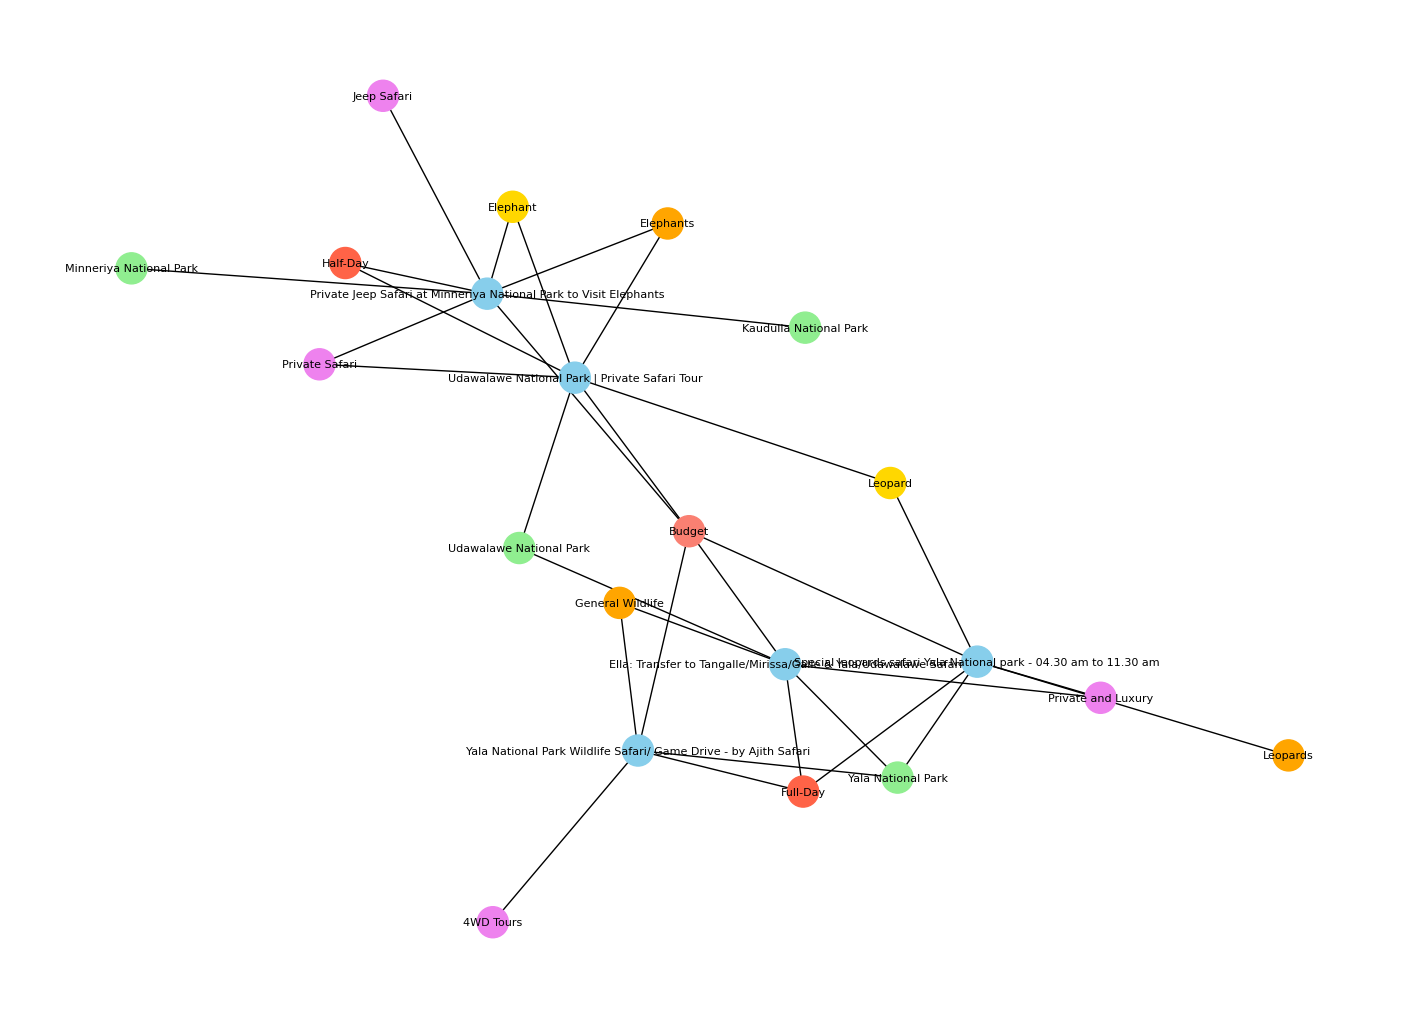

In [11]:
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5)

# Color nodes by type
# Color nodes by type
colors = []
for node, attr in G.nodes(data=True):
    if attr['type'] == 'tour':
        colors.append('skyblue')
    elif attr['type'] == 'location':
        colors.append('lightgreen')
    elif attr['type'] == 'wildlife':
        colors.append('orange')
    elif attr['type'] == 'safari_type':
        colors.append('violet')
    elif attr['type'] == 'attraction':
        colors.append('gold')
    elif attr['type'] == 'duration':
        colors.append('tomato')
    elif attr['type'] == 'price':
        colors.append('salmon')
    else:
        colors.append('gray')

nx.draw(G, pos, with_labels=True, node_color=colors, font_size=8, node_size=500)
plt.show()